In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
for module in tf, mpl, np, pd, sklearn:
    print(module.__name__, module.__version__)

tensorflow 2.5.0
matplotlib 3.3.4
numpy 1.20.1
pandas 1.2.4
sklearn 0.24.1


In [3]:
(x_train_all, y_train_all), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(np.max(x_train), np.min(x_train))

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
255 0


In [4]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [5]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 0.4581 - accuracy: 0.8310 - val_loss: 0.3628 - val_accuracy: 0.8682
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3538 - accuracy: 0.8678 - val_loss: 0.3461 - val_accuracy: 0.8706
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8820 - val_loss: 0.3219 - val_accuracy: 0.8848
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8905 - val_loss: 0.3114 - val_accuracy: 0.8896
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2760 - accuracy: 0.8967 - val_loss: 0.3234 - val_accuracy: 0.8826
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9042 - val_loss: 0.3151 - val_accuracy: 0.8902
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2446 - accuracy: 0.9074 - val_loss: 0.3454 - val_accuracy:

In [8]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

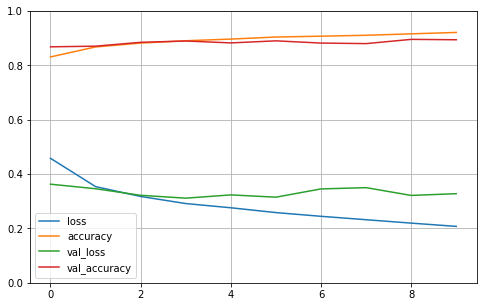

In [9]:
plot_learning_curver(history)

In [10]:
model.evaluate(x_test_scaled, y_test, verbose=2)

313/313 - 0s - loss: 0.3533 - accuracy: 0.8834


[0.3532503843307495, 0.883400022983551]

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [12]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


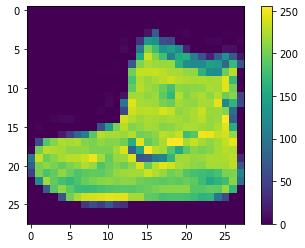

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

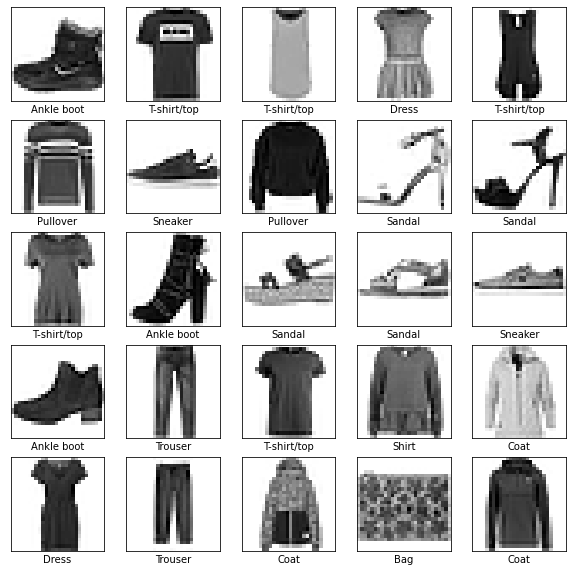

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=[28, 28]),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4989 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8904


In [19]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8707


[0.3552911579608917, 0.8707000017166138]

In [20]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[3.4739791e-05 2.7392861e-07 1.9945938e-07 3.7734253e-07 4.2557117e-06
 3.2884546e-02 9.3041363e-06 5.0252929e-02 6.1867089e-05 9.1675150e-01]
9
9


In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

In [22]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

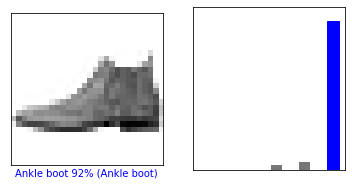

In [23]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

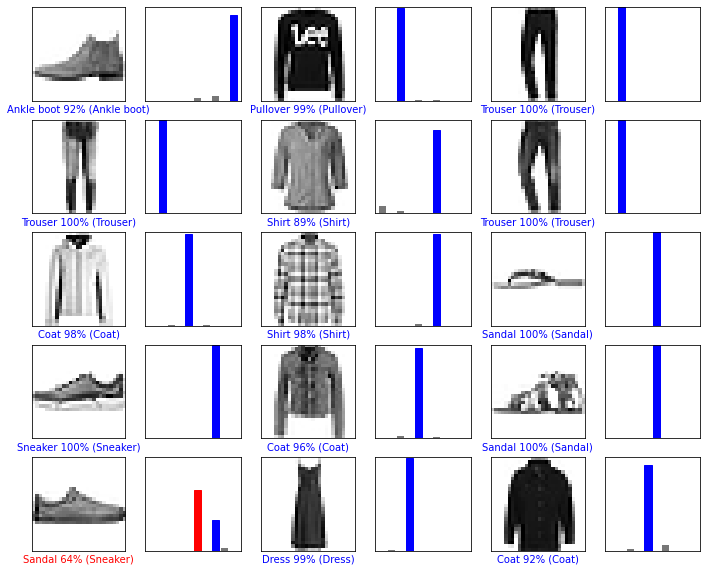

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

img = test_images[0]

img = (np.expand_dims(img, 0))

In [25]:
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.4739791e-05 2.7392861e-07 1.9945938e-07 3.7734253e-07 4.2557117e-06
  3.2884546e-02 9.3041363e-06 5.0252929e-02 6.1867089e-05 9.1675150e-01]]


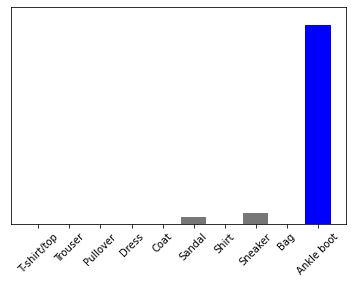

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [29]:
print(tf.__version__)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

2.5.0
matplotlib 3.3.4
numpy 1.20.1
pandas 1.2.4
sklearn 0.24.1
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [30]:
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


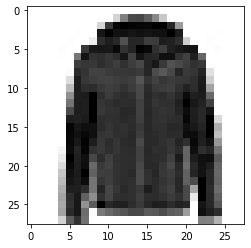

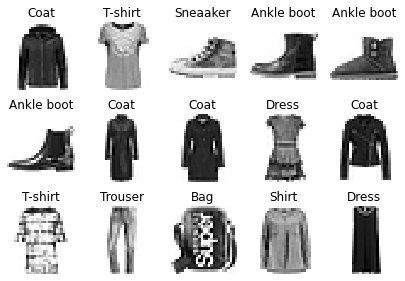

In [31]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()


show_single_image(x_train[0])


def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary',
                       interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()


class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaaker',
               'Bag', "Ankle boot"]
show_imgs(3, 5, x_train, y_train, class_names)

In [32]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
print(model.layers)

[<tensorflow.python.keras.layers.core.Flatten object at 0x0000017DD48E1700>, <tensorflow.python.keras.layers.core.Dense object at 0x0000017D5AF34880>, <tensorflow.python.keras.layers.core.Dense object at 0x0000017DD98E9610>, <tensorflow.python.keras.layers.core.Dense object at 0x0000017DD48A7520>]


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2680 - accuracy: 0.7075 - val_loss: 0.6634 - val_accuracy: 0.7384
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6455 - accuracy: 0.7618 - val_loss: 0.5578 - val_accuracy: 0.7984
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5205 - accuracy: 0.8165 - val_loss: 0.4580 - val_accuracy: 0.8330
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4483 - accuracy: 0.8400 - val_loss: 0.4347 - val_accuracy: 0.8488
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4246 - accuracy: 0.8487 - val_loss: 0.4143 - val_accuracy: 0.8594
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4052 - accuracy: 0.8562 - val_loss: 0.4207 - val_accuracy: 0.8518
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8601 - val_loss: 0.4016 - val_accuracy:

In [37]:
type(history)

tensorflow.python.keras.callbacks.History

In [38]:
print(history.history)

{'loss': [2.2679617404937744, 0.6455467939376831, 0.520530104637146, 0.44830644130706787, 0.42460429668426514, 0.4052193760871887, 0.3962729275226593, 0.37752389907836914, 0.3705672323703766, 0.35558462142944336], 'accuracy': [0.7074909210205078, 0.7617636322975159, 0.816490888595581, 0.8399636149406433, 0.848654568195343, 0.8562363386154175, 0.8601090908050537, 0.8653091192245483, 0.8691818118095398, 0.8728363513946533], 'val_loss': [0.6634048819541931, 0.5578297972679138, 0.4580141603946686, 0.43467020988464355, 0.4143037497997284, 0.4207477569580078, 0.4015994369983673, 0.39802536368370056, 0.39654436707496643, 0.410854697227478], 'val_accuracy': [0.7383999824523926, 0.7983999848365784, 0.8330000042915344, 0.848800003528595, 0.8593999743461609, 0.8518000245094299, 0.8676000237464905, 0.8676000237464905, 0.8677999973297119, 0.8694000244140625]}


In [39]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

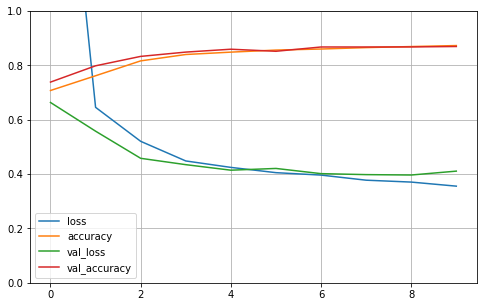

In [40]:
plot_learning_curver(history)

plt.show()

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [42]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

In [43]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_lables))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [44]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4947 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3338 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2779 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8846
0.8845999836921692


In [49]:
predictions = model.predict(test_images)
print(predictions[0])

[1.2778318e-05 3.4087034e-08 1.5065574e-07 3.6118635e-08 3.2531101e-08
 2.9359991e-04 1.1671303e-06 3.6342018e-03 1.7041967e-06 9.9605632e-01]


In [50]:
print(np.argmax(predictions[0]))
print(test_lables[0])

9
9


In [51]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [53]:
train_images = np.expand_dims(train_images, -1)
print(train_images.shape)

test_images = np.expand_dims(test_images, -1)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=train_images.shape[1:], activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [55]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)        

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [57]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 10ms/step - loss: 0.8123 - acc: 0.7092 - val_loss: 0.4554 - val_acc: 0.8406
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4178 - acc: 0.8495 - val_loss: 0.3884 - val_acc: 0.8511
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3627 - acc: 0.8680 - val_loss: 0.3488 - val_acc: 0.8689
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3288 - acc: 0.8781 - val_loss: 0.3243 - val_acc: 0.8811
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3111 - acc: 0.8859 - val_loss: 0.2776 - val_acc: 0.8975
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2963 - acc: 0.8911 - val_loss: 0.2687 - val_acc: 0.9013
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2836 - acc: 0.8949 - val_loss: 0.2823 - val_acc: 0.9002
Epoch 8/10
1875/1875 [==========================

In [58]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


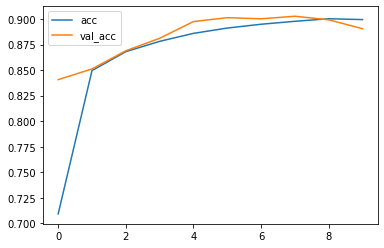

In [59]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

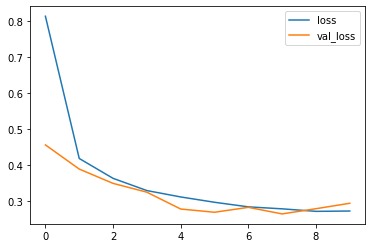

In [60]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()